Found 228 files belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2

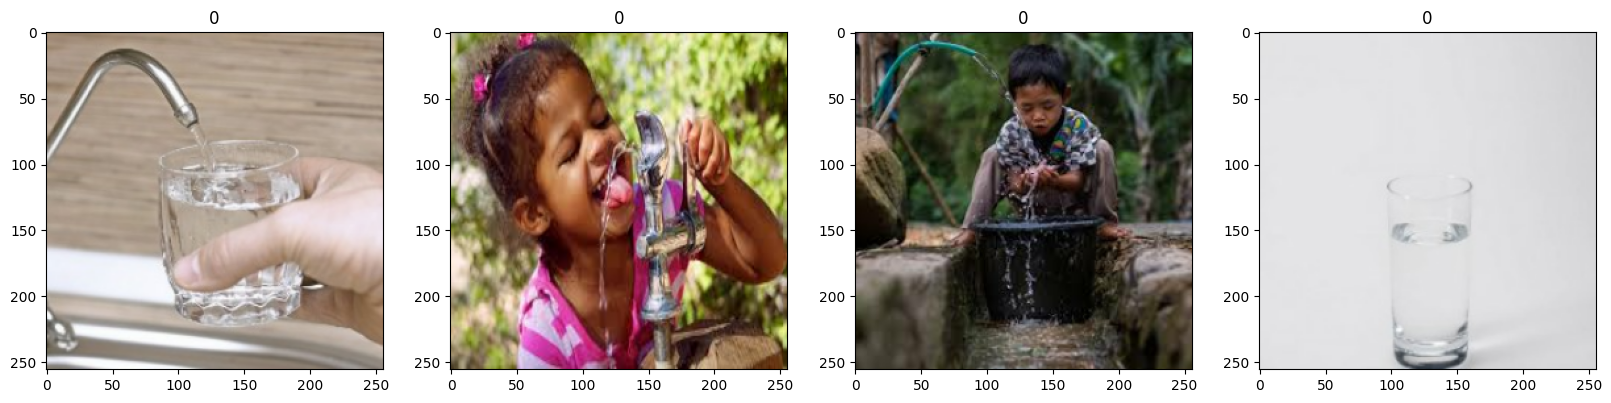

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import warnings
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
data_dir = "water images"
img_ext = ['jpeg','jpg','png','bmp']
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,img_class)):
        img_path = os.path.join(data_dir,img_class,image)
        try:
            img=cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_ext:
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image {}'.format(img_path))
data = tf.keras.utils.image_dataset_from_directory('water images') #building data
data_iterator = data.as_numpy_iterator()    #loop and access data
batch = data_iterator.next()    #access one batch
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):  #0 represents clear and 1 represents dirty this loop plots and displays the images from the batch 
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
data = data.map(lambda x,y:(x/255,y)) # as each batches max size is 255 we are reducing it to 1, x - images, y -target variable
scaled = data.as_numpy_iterator()
scale_batch = scaled.next()
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
model  = Sequential()
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3))) #this concolution layer has 16 filters which is going to be in 3*3 pixels and moves 1 pixel each time and relu helps in accounting non-linear patterns
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1, activation='relu')) 
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1, activation='relu')) 
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=24,validation_data=val,callbacks=[tensorboard_callback])


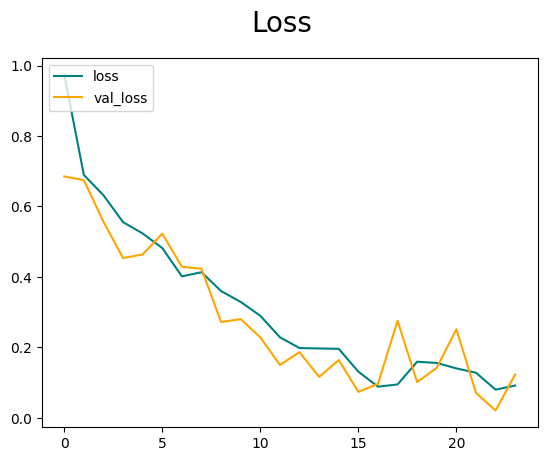

In [3]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

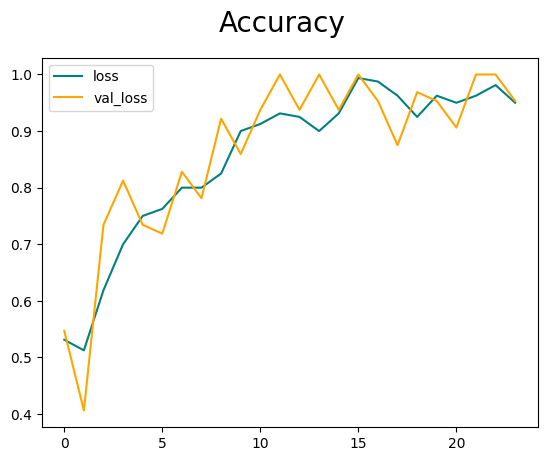

In [4]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [5]:
from keras.metrics import Precision,Recall,BinaryAccuracy
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat= model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    acc.update_state(y,yhat)
print('precision:',precision.result().numpy())
print('recall:',recall.result().numpy())
print('accuracy:',acc.result().numpy())

1/1 [==============================] - 0s 174ms/step
precision: 1.0
recall: 1.0
accuracy: 1.0


In [14]:
img = cv2.imread('clea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256,256))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
binary_pred = np.round(pred)
binary_pred
if binary_pred[0][0]==1:
    print(f'predicted class is dirty')
else:
    print(f'predicted class is clean')

1/1 [==============================] - 0s 40ms/step
predicted class is clean


In [6]:
batch[1]

array([0, 0, 1, 0])

In [7]:
batch[0].max()

1.0

In [8]:
scale_batch[0].max()

1.0

In [9]:
len(data)

8

In [10]:
train_size

5

In [11]:
val_size

2

In [12]:
test_size

1

In [13]:
# len(train)
len(val)
# len(test)

2

In [14]:
hist.history

{'loss': [1.1742538213729858,
  0.7137519121170044,
  0.6955788135528564,
  0.6633866429328918,
  0.5720494389533997,
  0.5135525465011597,
  0.48614034056663513,
  0.46195682883262634,
  0.47840651869773865,
  0.3780207335948944,
  0.3618740439414978,
  0.2826745808124542,
  0.3066704571247101,
  0.2207101285457611,
  0.16314586997032166,
  0.15740478038787842,
  0.11830835044384003,
  0.096968874335289,
  0.052907876670360565,
  0.04115526005625725,
  0.03352443501353264,
  0.03310033306479454,
  0.06779761612415314,
  0.04993290826678276],
 'accuracy': [0.5062500238418579,
  0.5249999761581421,
  0.48750001192092896,
  0.5,
  0.78125,
  0.737500011920929,
  0.737500011920929,
  0.78125,
  0.7562500238418579,
  0.8374999761581421,
  0.84375,
  0.8999999761581421,
  0.887499988079071,
  0.9375,
  0.9624999761581421,
  0.9437500238418579,
  0.9750000238418579,
  0.981249988079071,
  0.9937499761581421,
  0.9937499761581421,
  1.0,
  1.0,
  0.981249988079071,
  0.987500011920929],
 'val